In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [50]:
# Viz Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.precision', 2)
# pd.options.display.float_format = '{:.0f}'.format
# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

# All imports here
from sklearn.compose import make_column_selector

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import StackingClassifier, VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib
# from pdpbox import pdp, info_plots
# import shap
# shap.initjs()
# import lime
# import lime.lime_tabular

In [3]:
# First Look into the data
input_df = pd.read_csv("../data/Base.csv")
print(f'Rows - {input_df.shape[0]}, Columns - {input_df.shape[1]}')
input_df.head()

Rows - 1000000, Columns - 32


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.17,-1,88,50,2.09e-02,-1.33,AA,769,10650.77,3134.32,3863.65,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.89,windows,0,1,0,7
1,1,0.9,0.30,-1,144,50,5.42e-03,-0.82,AB,366,534.05,2670.92,3124.30,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.80,windows,0,1,0,7
2,1,0.9,0.04,-1,132,40,3.11e+00,-0.76,AC,870,4048.53,2893.62,3159.59,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.73,other,0,1,0,7
3,1,0.9,0.16,-1,22,50,1.91e-02,-1.21,AB,810,3457.06,4054.91,3022.26,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.05,linux,0,1,0,7
4,1,0.9,0.60,-1,218,50,4.44e-03,-0.77,AB,890,5020.34,2728.24,3087.67,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.78,macintosh,1,1,0,7


In [23]:
# Checking the datatype of the columns
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [24]:
# Extract Continuous & Categorical Columns
cat_cols = input_df.select_dtypes(include=['object']).columns.tolist()
cont_cols = input_df.select_dtypes(exclude=['object']).columns.tolist()
print(f'Categorical Columns - {cat_cols}')
print("=========================================")
print(f'Continuous Columns - {cont_cols}')

Categorical Columns - ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Continuous Columns - ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


In [9]:
# Get Information on Categorical/Object Variables
input_df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [169]:
# Printing the unique values of Categorcal columns
for cols in cat_cols:
    print(cols, '-', input_df[cols].unique())

payment_type - ['AA' 'AB' 'AC' 'AD' 'AE']
employment_status - ['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
housing_status - ['BA' 'BB' 'BC' 'BD' 'BE' 'BF' 'BG']
source - ['INTERNET' 'TELEAPP']
device_os - ['windows' 'other' 'linux' 'macintosh' 'x11']


In [170]:
# Details of Numeric Columns
input_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000,0,0,0,0,0,0,1
income,1000000,1,0,0,0,1,1,1
name_email_similarity,1000000,0,0,0,0,0,1,1
prev_address_months_count,1000000,17,44,-1,-1,-1,12,383
current_address_months_count,1000000,87,88,-1,19,52,130,428
customer_age,1000000,34,12,10,20,30,40,90
days_since_request,1000000,1,5,0,0,0,0,78
intended_balcon_amount,1000000,9,20,-16,-1,-1,5,113
zip_count_4w,1000000,1573,1005,1,894,1263,1944,6700
velocity_6h,1000000,5665,3009,-171,3436,5320,7681,16716


In [171]:
# Printing the unique count of Cont columns
# Get the number of unique values in each column of the DataFrame
input_df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [172]:
# Printing the unique values of Categorcal columns
discreet_column = []
for cols in cont_cols:
    if len(list(input_df[cols].unique())) < 15:
        discreet_column.append(cols)
        print(cols, '-', input_df[cols].unique())
discreet_column

fraud_bool - [1 0]
income - [0.9 0.3 0.7 0.6 0.4 0.2 0.8 0.1 0.5]
customer_age - [50 40 30 20 70 60 80 10 90]
email_is_free - [0 1]
phone_home_valid - [1 0]
phone_mobile_valid - [0 1]
has_other_cards - [0 1]
proposed_credit_limit - [ 500. 1500.  200. 2000. 1900. 1000.  990.  490.  510.  190.  210. 2100.]
foreign_request - [0 1]
keep_alive_session - [0 1]
device_distinct_emails_8w - [ 1  2  0 -1]
device_fraud_count - [0]
month - [7 3 2 1 6 0 5 4]


['fraud_bool',
 'income',
 'customer_age',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

Text(0.5, 1.0, 'Number of Transactions by Fraud Status')

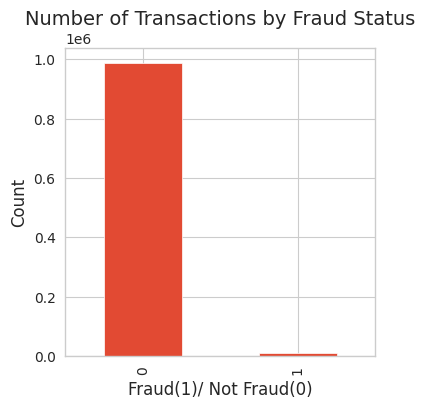

In [173]:
# Understanding the distribution of label column
plt.figure(figsize=(4,4))
fraud_count = input_df['fraud_bool'].value_counts().plot(kind='bar')
fraud_count

# Customize labels and legend
plt.xlabel("Fraud(1)/ Not Fraud(0)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

## Univarate Analysis

In [174]:
numeric_features = [x for x in input_df.columns if input_df[x].nunique() >= 10]
print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


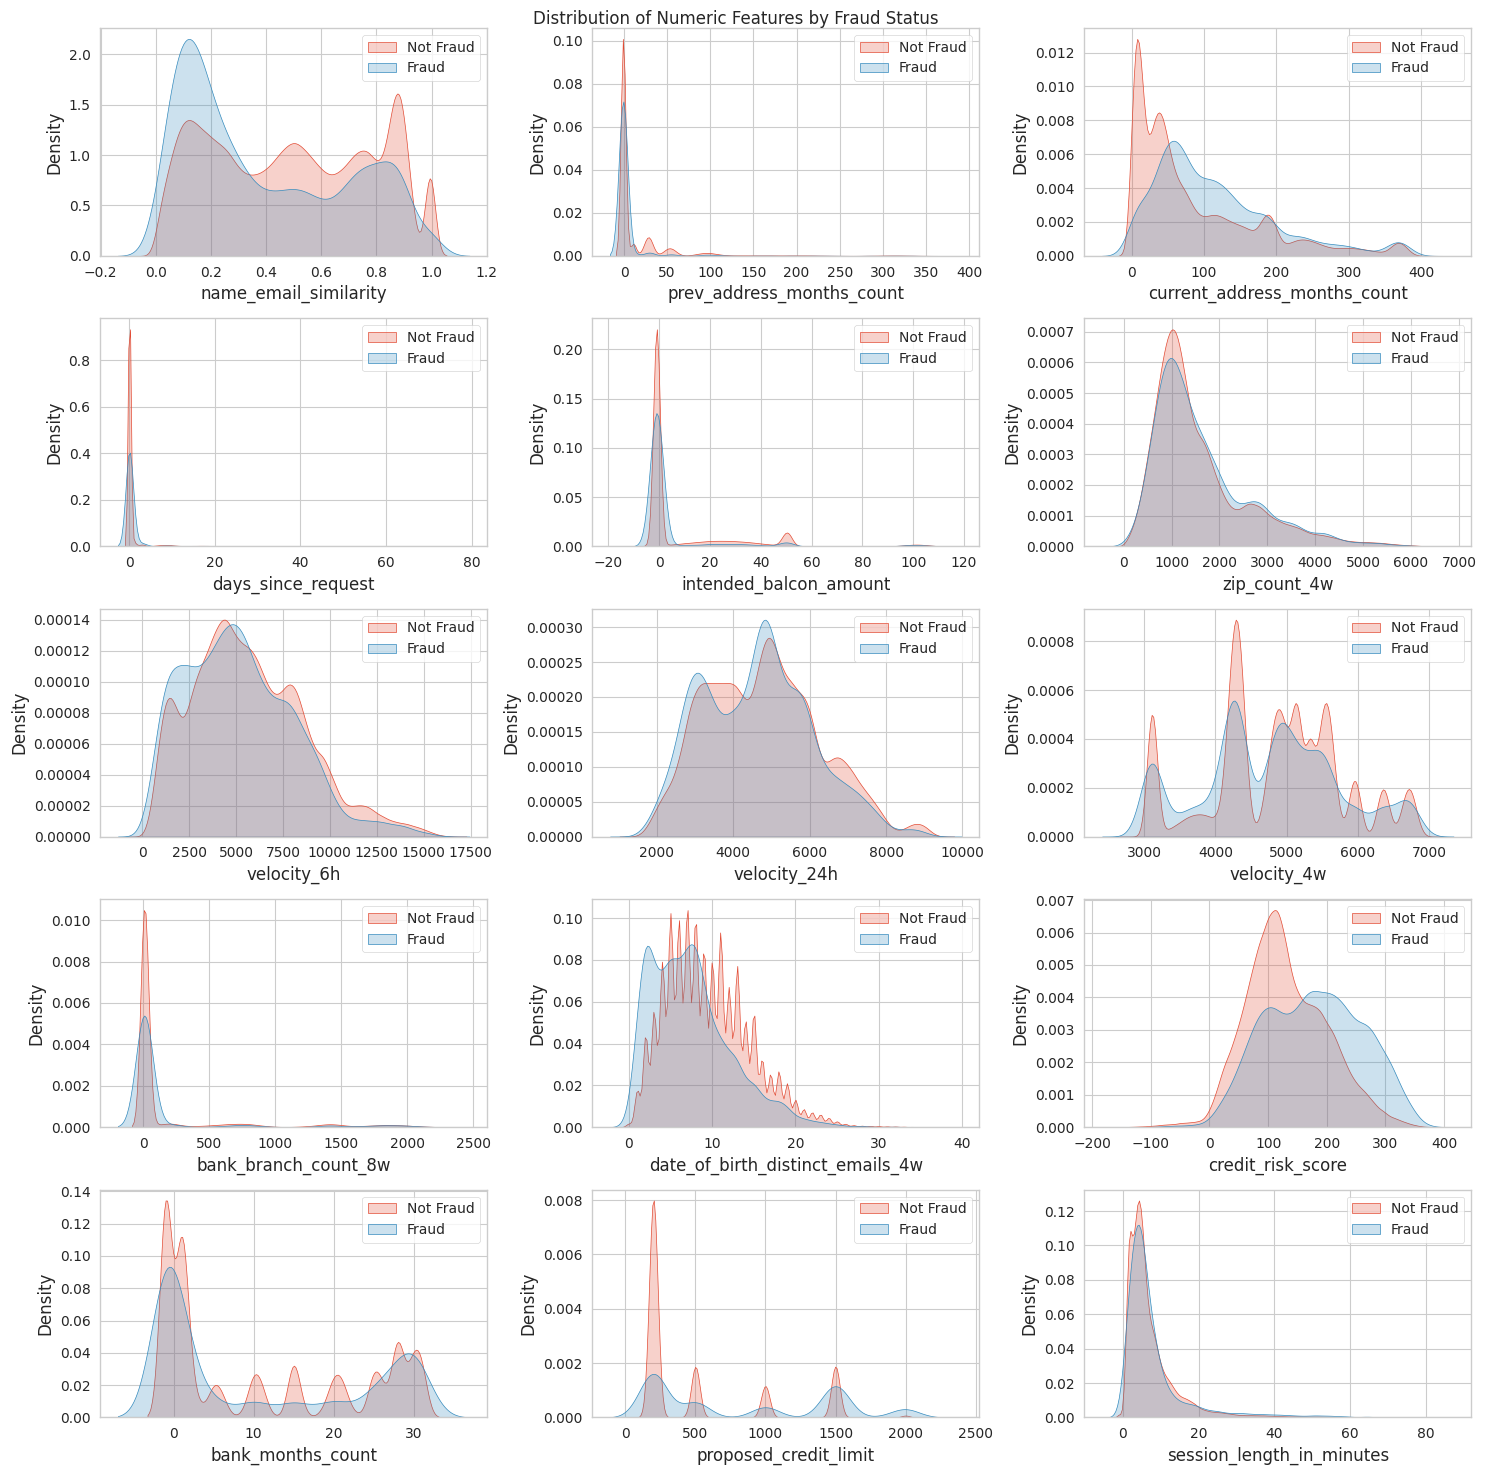

In [175]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=input_df[input_df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=input_df[input_df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

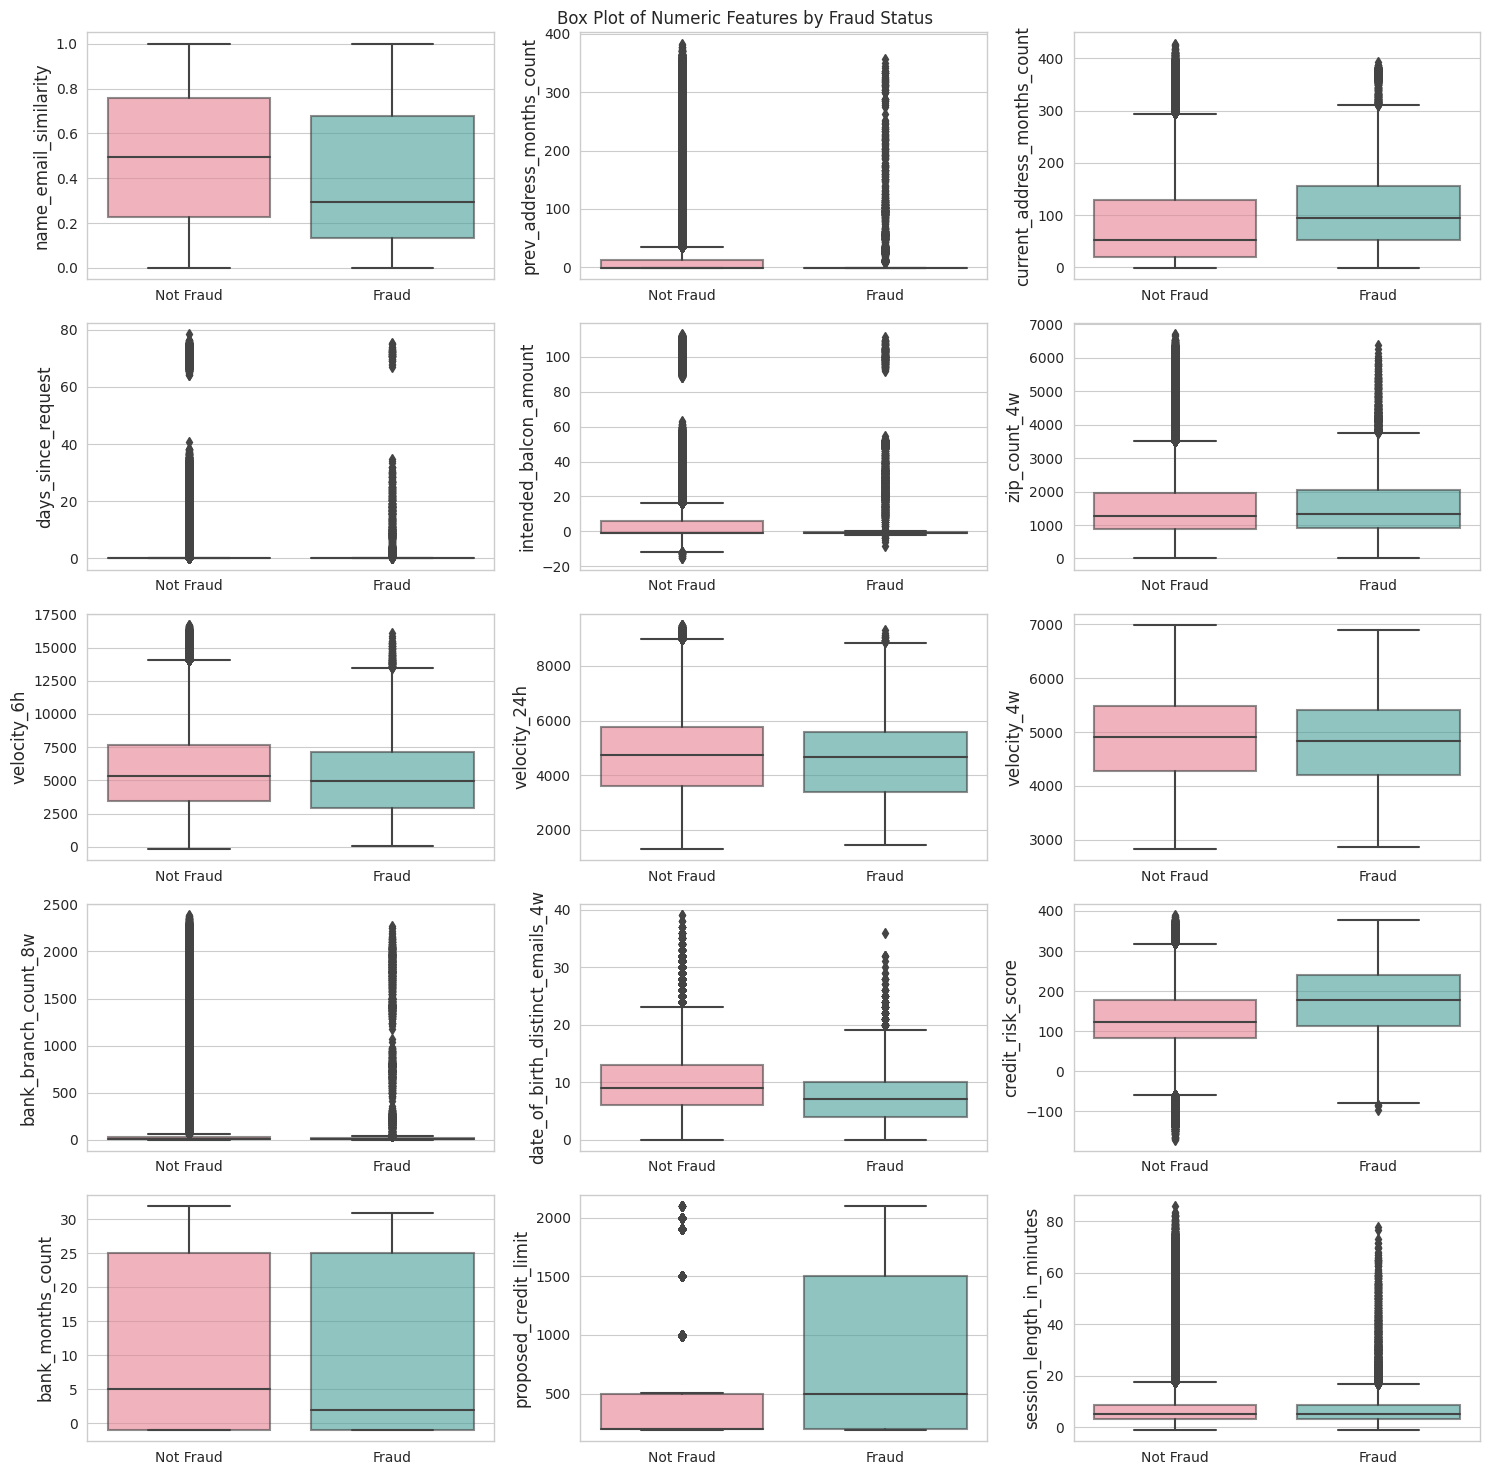

In [176]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=input_df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_32/1438388783.py:9: UserWarning:

The figure layout has changed to tight



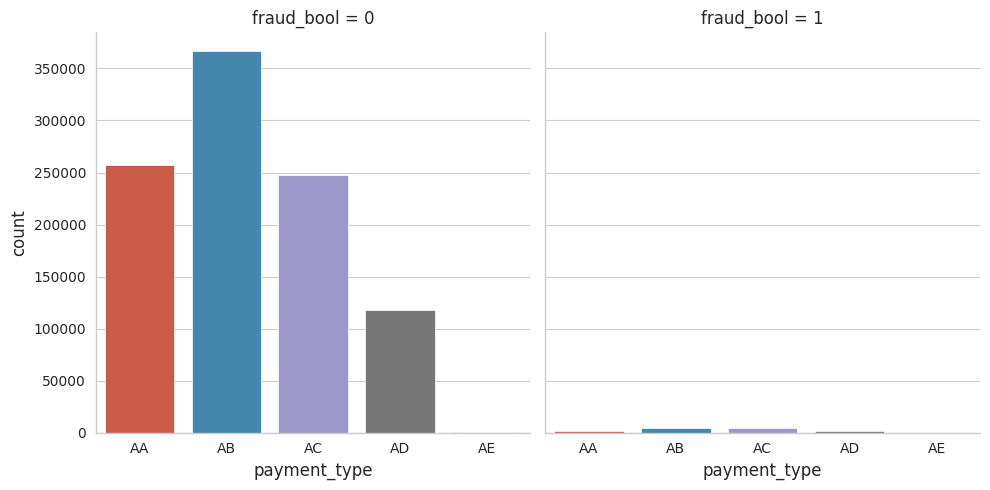

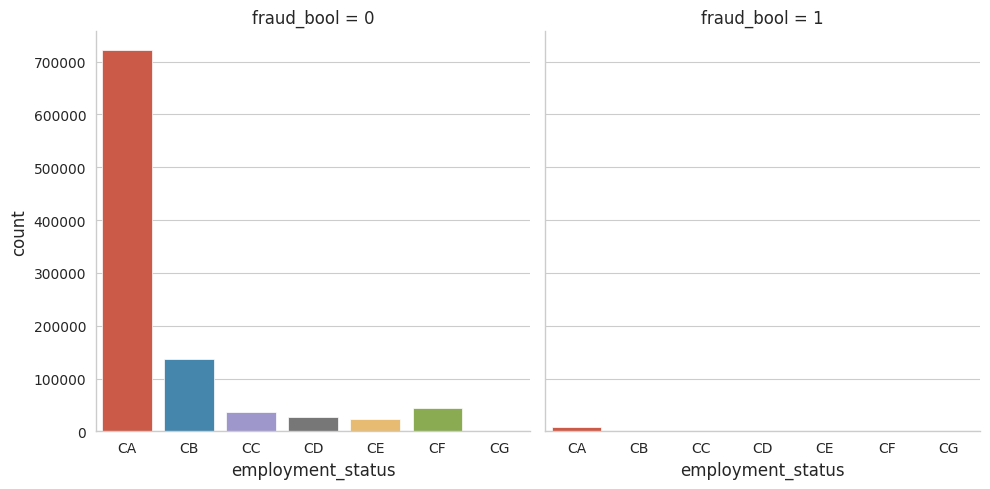

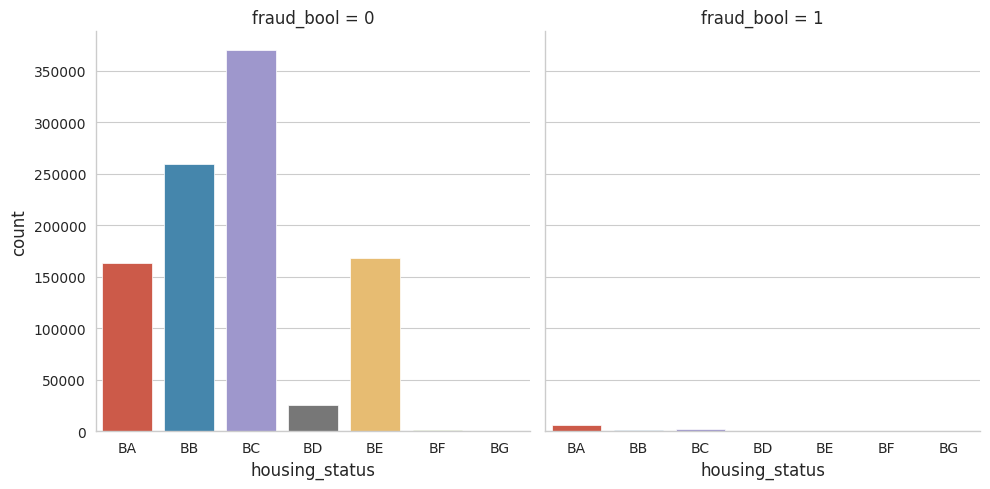

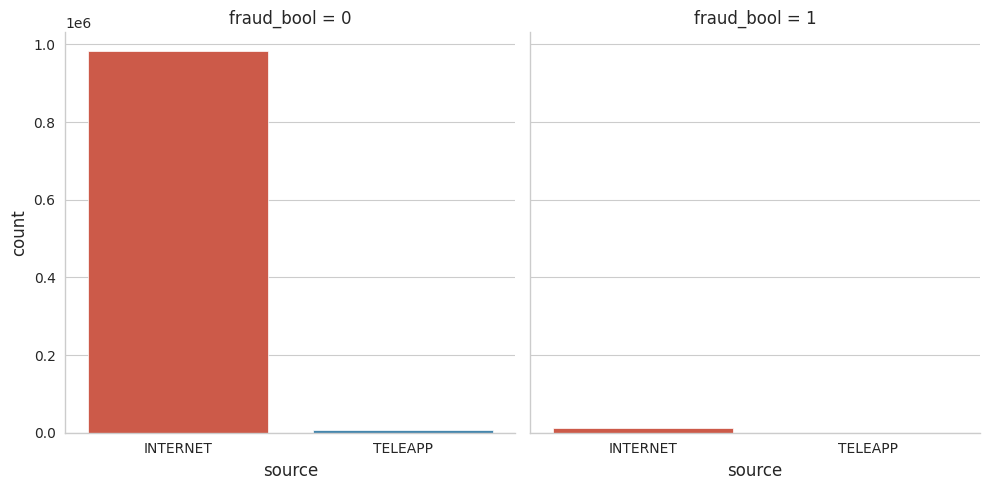

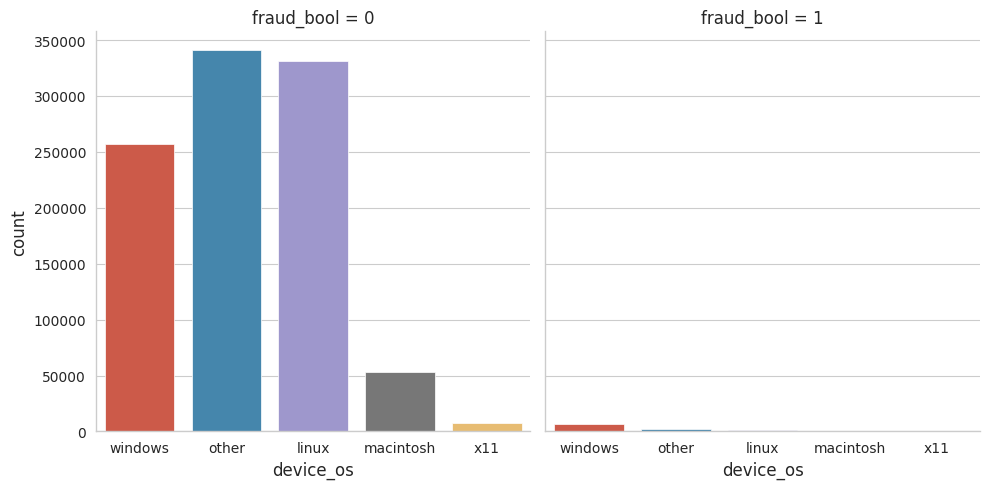

In [177]:
# Bivariate Analysis of Categorical Columns

# Add a title to the figure
fig.suptitle('Distribution of Categorical Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(cat_cols):
    sns.catplot(x=feature, col="fraud_bool", data=input_df, kind="count");
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/opt/conda/lib/python3.10/site-packages/seaborn/

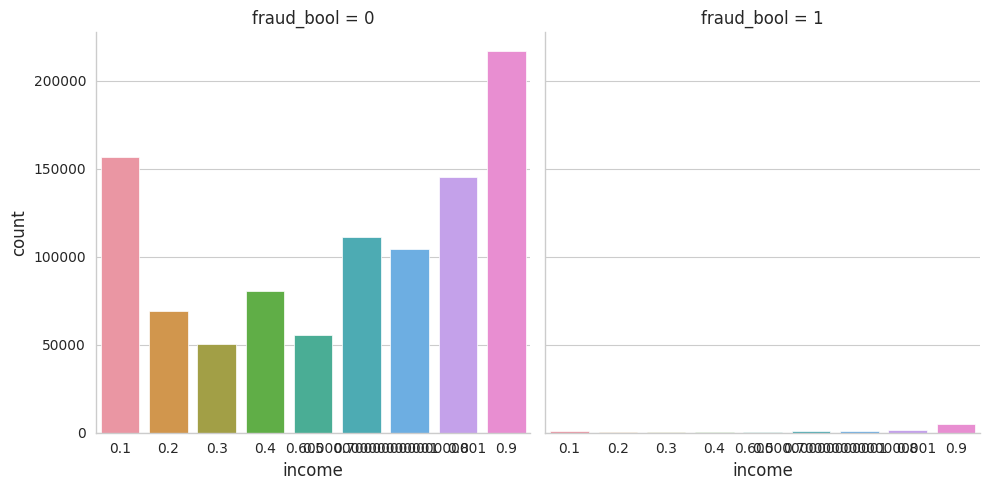

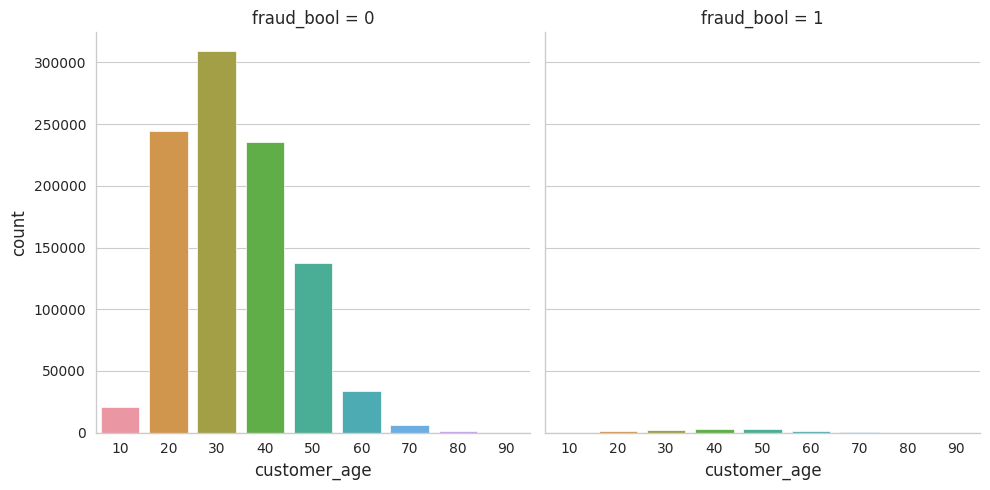

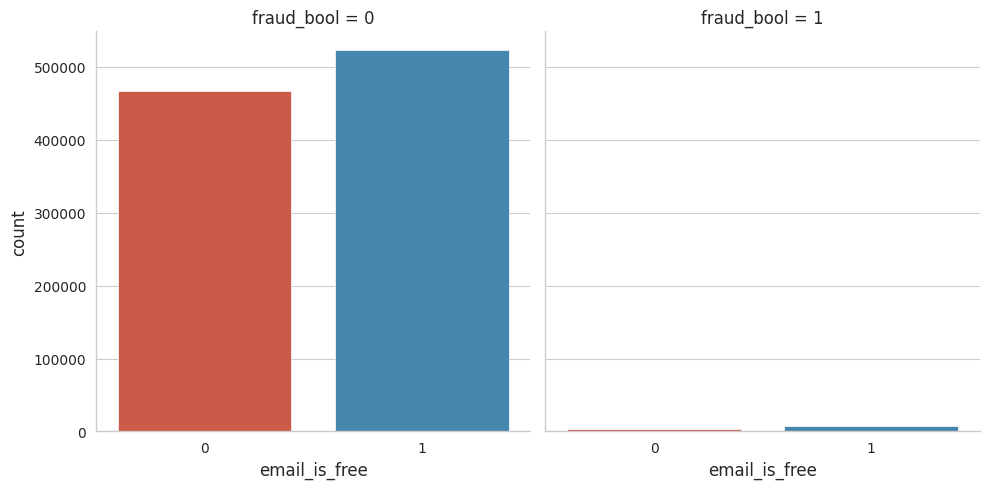

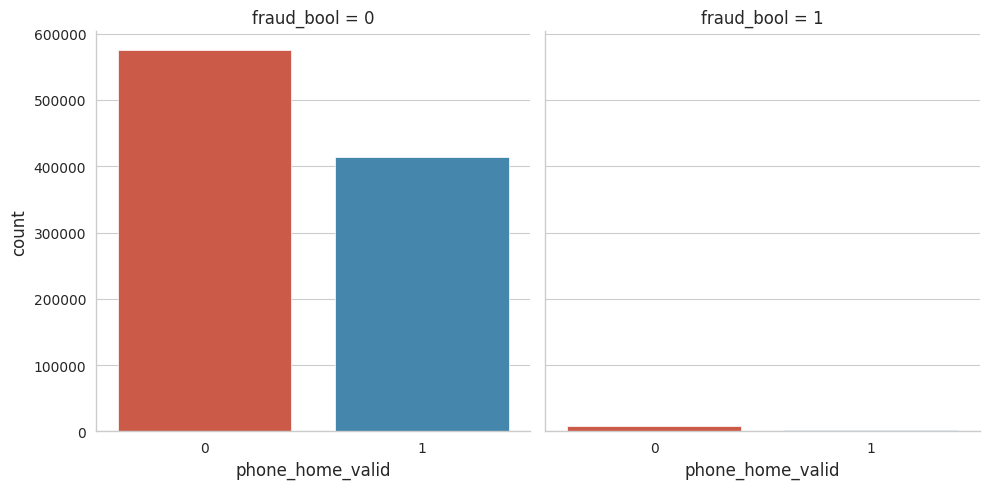

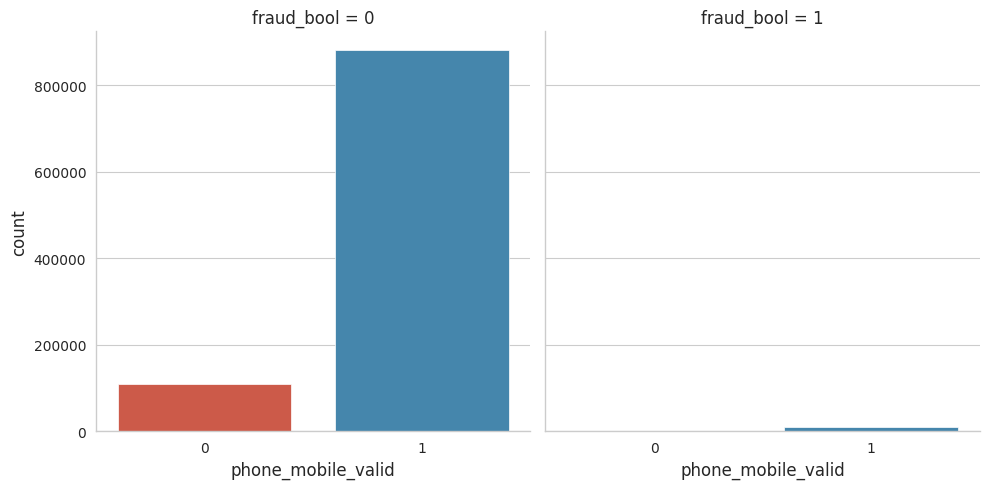

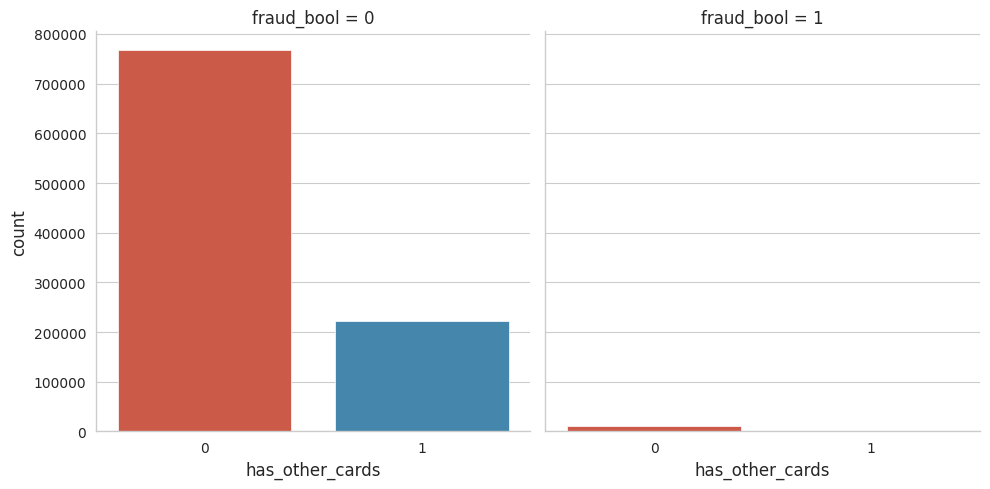

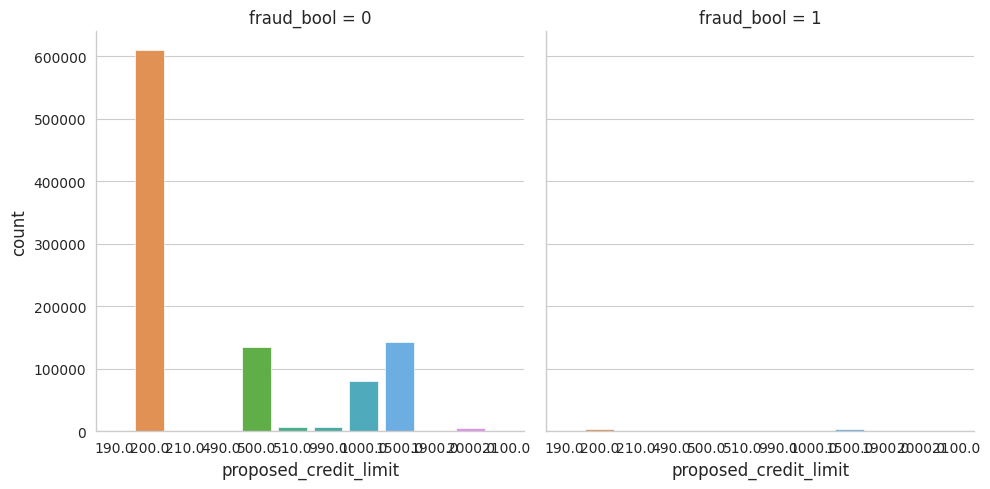

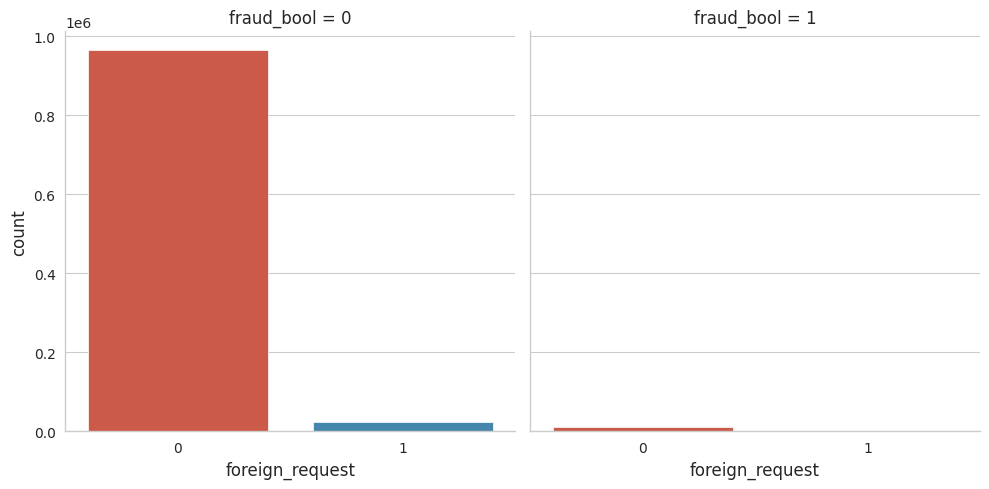

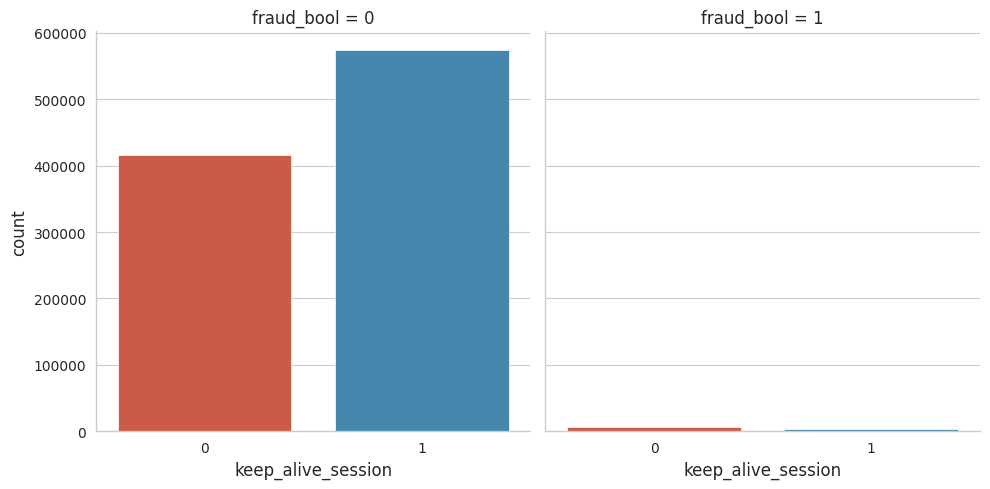

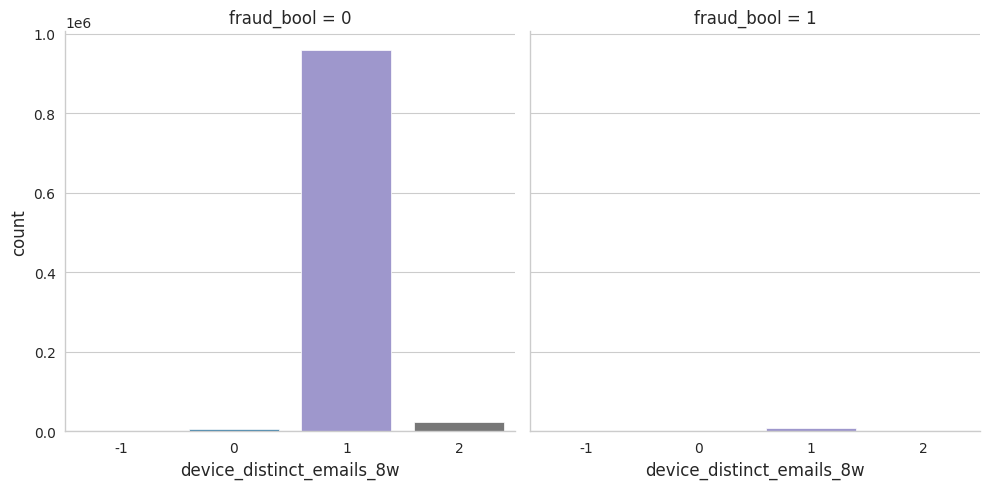

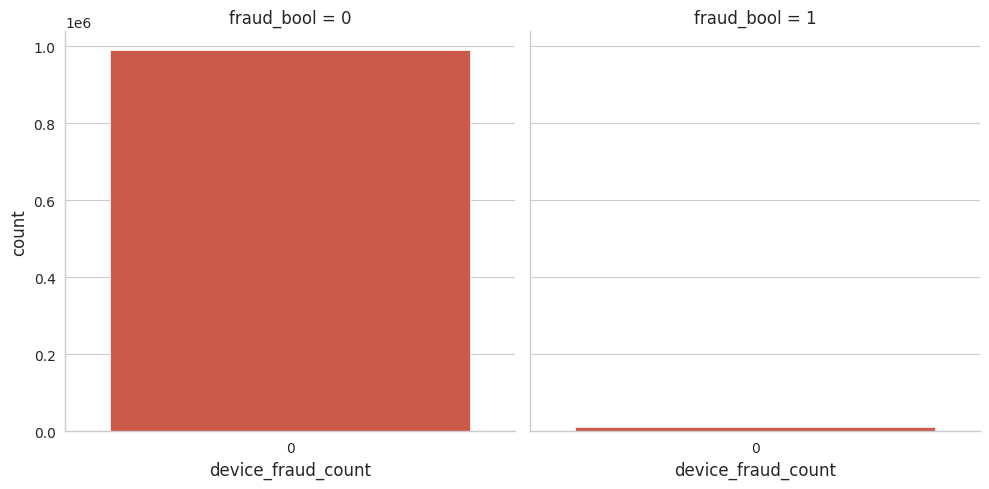

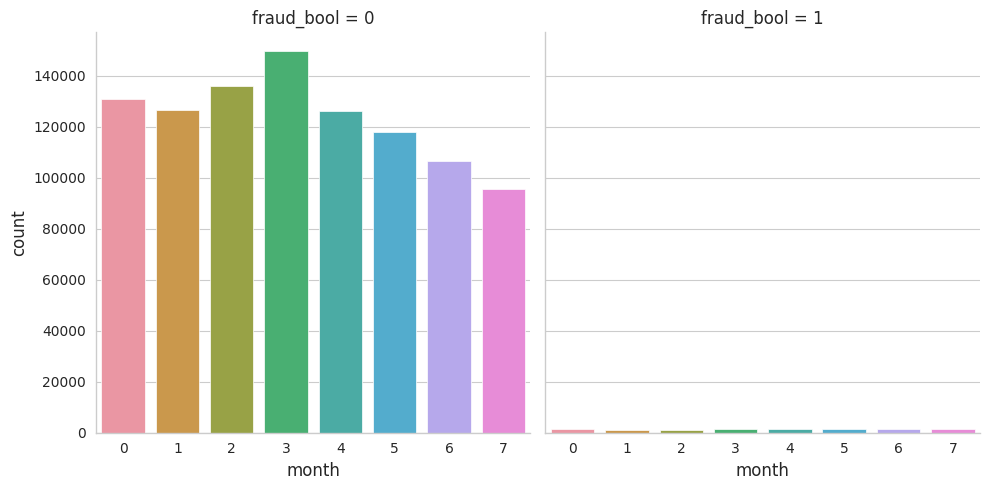

In [178]:
# Bivariate Analysis of Discreet Columns

# Add a title to the figure
fig.suptitle('Distribution of Discreet Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(discreet_column[1:]):
    sns.catplot(x=feature, col="fraud_bool", data=input_df, kind="count");
plt.tight_layout()
plt.show()

## Convert All Columns to Numeric

In [13]:
def map_categorical_column(df):
    
    ''' Function to map the categorical columns '''
     
    map_payment_type      = {'AA':0, 'AB':1, 'AC':2, 'AD':3, 'AE':4}
    map_employment_status = {'CA':0, 'CB':1, 'CC':2, 'CD':3, 'CE':4,'CF':5,'CG':6}
    map_housing_status    = {'BA':0, 'BB':1, 'BC':2, 'BD':3, 'BE':4,'BF':5,'BG':6}
    map_source            = {'INTERNET':0,'TELEAPP':1}
    map_device_os         = {'windows':0,'other':1,'linux':2,'macintosh':3,'x11':4}
    
    # Updating the mapping in dataframe
    df["payment_type"]                 = df["payment_type"].map(map_payment_type)
    df["employment_status"]            = df["employment_status"].map(map_employment_status)
    df["housing_status"]               = df["housing_status"].map(map_housing_status)
    df["source"]                       = df["source"].map(map_source)
    df["device_os"]                    = df["device_os"].map(map_device_os)

    return df

In [14]:
input_df_copy = input_df.copy()
input_df_num = map_categorical_column(input_df_copy)
input_df_num.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.17,-1,88,50,2.09e-02,-1.33,0,769,10650.77,3134.32,3863.65,1,6,0,185,0,0,1,0,24,0,500.0,0,0,3.89,0,0,1,0,7
1,1,0.9,0.30,-1,144,50,5.42e-03,-0.82,1,366,534.05,2670.92,3124.30,718,3,0,259,1,0,0,0,15,0,1500.0,0,0,31.80,0,0,1,0,7
2,1,0.9,0.04,-1,132,40,3.11e+00,-0.76,2,870,4048.53,2893.62,3159.59,1,14,1,177,1,0,0,1,-1,0,200.0,0,0,4.73,1,0,1,0,7
3,1,0.9,0.16,-1,22,50,1.91e-02,-1.21,1,810,3457.06,4054.91,3022.26,1921,6,0,110,1,0,0,1,31,1,200.0,0,0,2.05,2,0,1,0,7
4,1,0.9,0.60,-1,218,50,4.44e-03,-0.77,1,890,5020.34,2728.24,3087.67,1990,2,0,295,1,0,1,0,31,0,1500.0,0,0,3.78,3,1,1,0,7


## Features Selection

In [12]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter

In [13]:
# Variance Threshold Test - Feature selector that removes all low-variance features.
# True: High Variance ; #False: Low Variance
selector = VarianceThreshold()
selector.fit(input_df_num)
# selector.get_support()
high_variance_col = [column for column in input_df_num.columns if column not in input_df_num.columns[selector.get_support()]]

for features in concol:
    print(f'Variable with low variance to be removed : {high_variance_col}')

NameError: name 'concol' is not defined

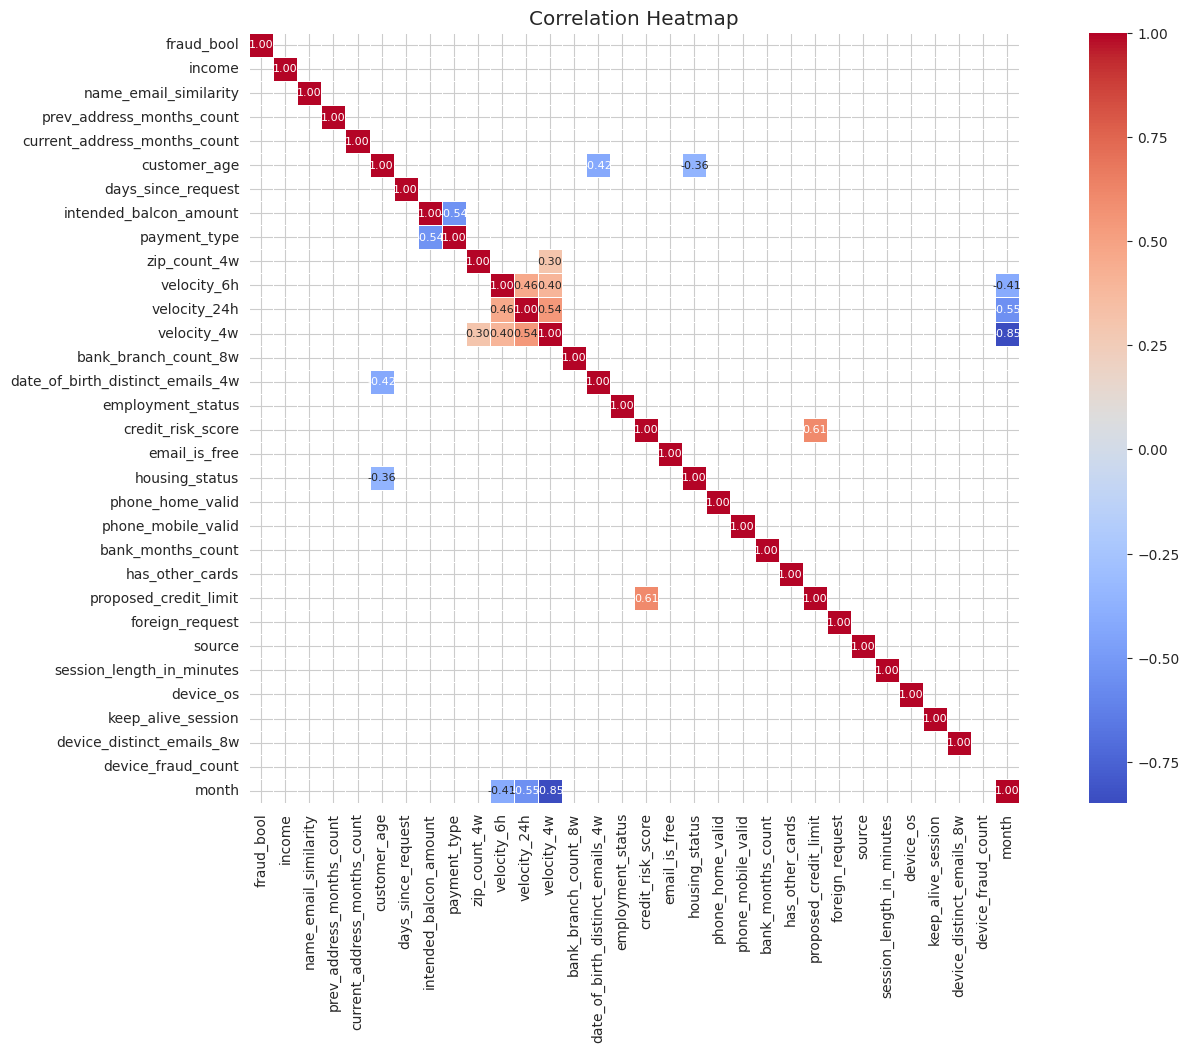

In [183]:
# Multicollinearity Test
X_Corr = input_df_num.corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_Corr[(X_Corr >= 0.3) | (X_Corr <= -0.3)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

Month can re removed. It shows strong co-linearity with velocity_4w

,feature,chi2,p_value
11,proposed_credit_limit,2188030,0
6,customer_age,17016,0
2,housing_status,5529,0
4,device_os,2096,0
1,employment_status,1269,0
13,keep_alive_session,1070,0
10,has_other_cards,960,0
8,phone_home_valid,719,0
0,payment_type,607,0
7,email_is_free,362,0


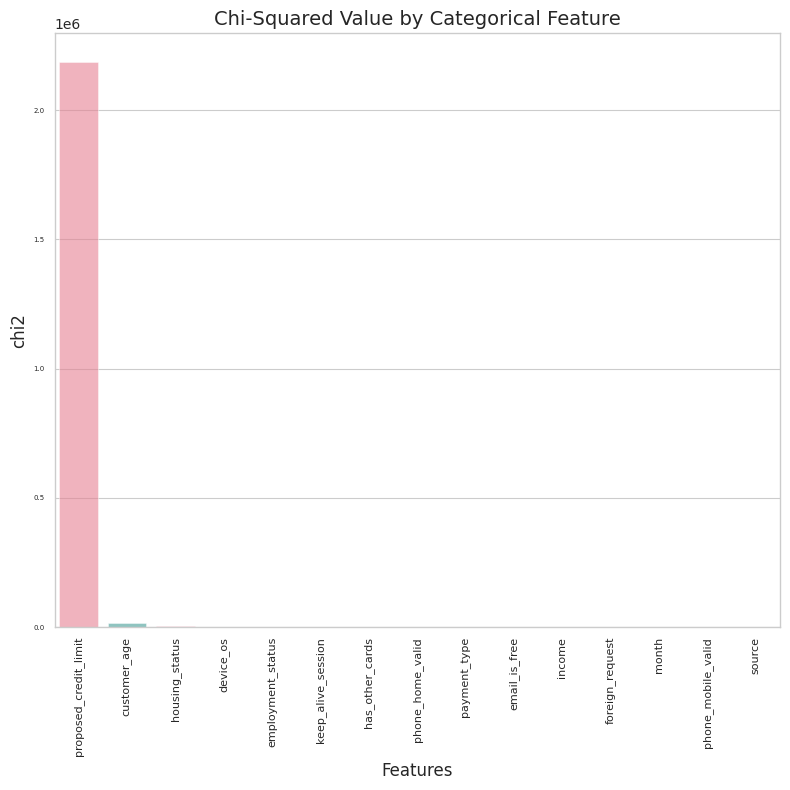

In [184]:
# discreet_column.remove('device_distinct_emails_8w') 
discreet_column_chi2 = discreet_column.copy()
discreet_column_chi2.remove('fraud_bool') # this is result column
discreet_column_chi2.remove('device_distinct_emails_8w') # device_distinct_emails_8w has -1. 
discreet_column_chi2.remove('device_fraud_count') # This has one value 0

cat_discrete_cols = cat_cols +  discreet_column_chi2

# Chi Square Test for Independence
chi2_results = chi2(input_df_num[cat_discrete_cols], input_df_num['fraud_bool'])

# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': cat_discrete_cols, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})
display(chi2_results_df.sort_values(by='chi2', ascending=False))

# Set up plot
plt.figure(figsize=(8, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [185]:
# Select top 10 features
best_chi2_cols = SelectKBest(chi2, k=10)
best_chi2_cols.fit(input_df_num[cat_discrete_cols], input_df_num['fraud_bool'])

# Get the names of the top 5 features
best_chi2_features = [input_df_num[cat_discrete_cols].columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['payment_type', 'employment_status', 'housing_status', 'device_os',
       'customer_age', 'email_is_free', 'phone_home_valid', 'has_other_cards',
       'proposed_credit_limit', 'keep_alive_session'],
      dtype='object')]


In [186]:
numeric_features 

['name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes']

In [187]:
# Mutual INformation Test for NUmeric Features
mutual_info_results = mutual_info_classif(input_df_num[numeric_features], input_df_num['fraud_bool'])
# mutual_info_results_df = pd.DataFrame(data={'feature': numeric_features, 'mutual_info': mutual_info_results})
# mutual_info_results_df

In [188]:
mutual_info_results_df = pd.DataFrame(data={'feature': numeric_features, 'mutual_info': mutual_info_results})
mutual_info_results_df

,feature,mutual_info
0,name_email_similarity,0
1,prev_address_months_count,0
2,current_address_months_count,0
3,days_since_request,0
4,intended_balcon_amount,0
5,zip_count_4w,0
6,velocity_6h,0
7,velocity_24h,0
8,velocity_4w,0
9,bank_branch_count_8w,0


In [189]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(input_df_num[numeric_features], input_df_num['fraud_bool'])

# Get the names of the top 5 features
best_mutual_info_features = [input_df_num[numeric_features].columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes'],
      dtype='object')]


In [190]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=5)
best_mutual_info_cols.fit(input_df_num[numeric_features], input_df_num['fraud_bool'])

# Get the names of the top 5 features
best_mutual_info_features = [input_df_num[numeric_features].columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['prev_address_months_count', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'bank_months_count', 'proposed_credit_limit'],
      dtype='object')]


### Define Initial Models for Effective Attributes

In [15]:
# Function for Precsion, Recall and F1 Score
def calc_classfier_metric(classifier, y_test, y_pred):
    '''
    Function for Precsion, Recall and F1 Score
    '''
    accuracy      = accuracy_score(y_test, y_pred)
    precision     = precision_score(y_test, y_pred)
    recall        = recall_score(y_test, y_pred)
    F1_score      = f1_score(y_test, y_pred)
    roc_auc_scr   = roc_auc_score(y_test, y_pred)
    conf_mat      = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    
    return accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr

In [16]:
# Build Classification Model
def build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model):
    '''
    Function to Build Classification Model for Individual Classifier
    '''
    print('Into build_individual_classifier_model')
    
    classifier_performance = []
    cnf_lst = []

    for classifier in classifier_model:

        # Fitting the training set into classification model
        classifier.fit(X_train,y_train)

        # Predicting the output on test datset
        y_pred = classifier.predict(X_test)    

        # Cross Validation Score on training test
        cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
        scores = cross_val_score(classifier, X_train,y_train, cv=5, scoring='f1_weighted')
        cv_score_mean = scores.mean()

        # Classification score
        accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr = calc_classfier_metric(classifier, y_test, y_pred)
        classifier_performance.append([classifier.__class__.__name__, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr, cv_score_mean, fpr, tpr])
        
        # Store the model into pkl
        joblib.dump(classifier, f'../model/{classifier.__class__.__name__}.pkl')
     
    class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR']).sort_values('F1_Score', ascending = False)
    
    return class_perf_df

In [17]:
def build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df):
    
    '''
    Function to Classifier Model for Voting Classifier
    '''
    
    print('Into build_voting_classifier_model')
    
    classifier_performance = []
    cnf_lst = []

    # Voting Classifier                
    clf1 = classifier_model[1]
    clf2 = classifier_model[2]
    clf3 = classifier_model[3]
    
    vote_classifier = VotingClassifier(
                                        estimators=[('ada', clf1),('xgb', clf2), ('lgb', clf3)],
                                        voting='soft'
                                    )
    
    # Fitting the training set into classification model
    vote_classifier.fit(X_train,y_train)

    # Predicting the output on test datset
    y_pred = vote_classifier.predict(X_test)    

    # Cross Validation Score on training test
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
    scores = cross_val_score(vote_classifier, X_train,y_train, cv=5, scoring='f1_weighted')
    cv_score_mean = scores.mean()

    # Classification score
    accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr = calc_classfier_metric(vote_classifier, y_test, y_pred)
    classifier_performance.append([vote_classifier.__class__.__name__, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr, cv_score_mean, fpr, tpr])
    
    # Store the model into pkl
    joblib.dump(vote_classifier, f'../model/{vote_classifier.__class__.__name__}.pkl')
        
    class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR']).sort_values('F1_Score', ascending = False)
    
    voting_class_df = pd.concat([ind_class_model_df, class_perf_df])
    
    return voting_class_df

In [18]:
# Build Classification Model
def build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, prev_class_model_df):
    
    '''
    Function to Classifier Model for Voting Classifier
    '''
    
    print('Into build_stacking_classifier_model')
    
    classifier_performance = []
    cnf_lst = []

    # Voting Classifier                
    clf1 = classifier_model[1]
    clf2 = classifier_model[2]
    clf3 = classifier_model[3]
    
    stacking_classifier = StackingClassifier(
                                                estimators = [('ada', clf1),('xgb', clf2), ('lgb', clf3)],
                                                final_estimator = LogisticRegression(),
                                                cv = 5
                                    )
    
    
    # Fitting the training set into classification model
    stacking_classifier.fit(X_train,y_train)

    # Predicting the output on test datset
    y_pred = stacking_classifier.predict(X_test)    

    # Cross Validation Score on training test
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
    scores = cross_val_score(stacking_classifier, X_train,y_train, cv=5, scoring='f1_weighted')
    cv_score_mean = scores.mean()

    # Classification score
    accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr = calc_classfier_metric(stacking_classifier, y_test, y_pred)
    classifier_performance.append([stacking_classifier.__class__.__name__, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr, cv_score_mean, fpr, tpr])
    
    # Store the model into pkl
    joblib.dump(stacking_classifier, f'../model/{stacking_classifier.__class__.__name__}.pkl')        
    class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR']).sort_values('F1_Score', ascending = False)
    
    stacking_class_df = pd.concat([prev_class_model_df, class_perf_df])
    
    return stacking_class_df

In [19]:
# Function for Confusion Matrix
def view_confusion_matrix(class_perf_df, columns):
    '''
    Function for Confusion Matrix
    '''
    rows = int(class_perf_df.shape[0]/ columns)
    plt.figure(figsize=(15,13))

    for i in range(class_perf_df.shape[0]):
        plt.subplot(rows,columns,i+1)
        plt.title(class_perf_df['Classifier'].loc[i])
        ax=sns.heatmap(class_perf_df['Conf_Mtrx'].loc[i],
                    annot=True,
                    cmap="coolwarm",
                    fmt="d",
                    cbar=False, 
                    annot_kws={"size": 12},
                    linewidths=1.2,
                    linecolor='w',
                   )
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')
    
    return

In [20]:
def create_sample_set(train_df, non_fraud_sample_sizse):
    
    # Select columns
    train_df = train_df[['prev_address_months_count', 'date_of_birth_distinct_emails_4w','credit_risk_score', 'bank_months_count', 
                         'proposed_credit_limit','customer_age', 'housing_status','device_os', 'employment_status',
                         'keep_alive_session','has_other_cards','phone_home_valid','payment_type', 'fraud_bool', 'month']]
    
    # Fraud Transactions
    train_df_fraud = train_df[train_df.fraud_bool == 1]
    display(f'Shape of train_df_fraud {train_df_fraud.shape}')
    
    # Non Fraud Transactions
    train_df_non_fraud = train_df[train_df.fraud_bool == 0].sample(train_df_fraud.shape[0] * non_fraud_sample_sizse)
    display(f'Shape of train_df_non_fraud {train_df_non_fraud.shape}')
    
    # Merge Fraud & Non Fraud
    train_df_merged = pd.concat([train_df_fraud, train_df_non_fraud])

    # Shuffle
    train_df_merged.iloc[:,:] = train_df_merged.sample(frac=1,random_state=123,ignore_index=True)
    display(f'After merge & shuffle Shape of train_df_merged {train_df_merged.shape}')
#     display(f'Value Counts:\n {train_df_merged["fraud_bool"].value_counts(normalize=True)}')
    
    # X & Y
    X                 = train_df_merged.drop(columns=['fraud_bool'])
    X['customer_age'] = X['customer_age'].apply(lambda x: 0 if x < 50 else 1)
    y                 = train_df_merged[['fraud_bool', 'month']]
    
    # Train Dataframe
    X_train = X[X.month <= 6].drop(columns=['month'])
    y_train = y[y.month <= 6].drop(columns=['month']).values.ravel()

    # Test Dataframe
    X_test = X[X.month > 6].drop(columns=['month'])
    y_test = y[y.month > 6].drop(columns=['month']).values.ravel()

    return X_train, y_train, X_test, y_test

In [21]:
X_train, y_train, X_test, y_test = create_sample_set(input_df_num, 1)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

# Machine Learning Model Build
classifier_model = [
                    RandomForestClassifier(random_state=42), 
                    AdaBoostClassifier(learning_rate = 0.1, n_estimators=500, random_state=42), 
                    XGBClassifier(colsample_bytree=1.0, gamma=5, learning_rate=1.0, max_depth=5, min_child_weight=1,    n_estimators=10, subsample=1.0, random_state=42),
                    LGBMClassifier(boosting_type = 'dart', colsample_bytree=1.0, learning_rate = 0.1, max_depth=10,n_estimators = 50, subsample=0.6, random_state=42)
                   ]

# Call Classification module
ind_class_model_df        = build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model)
ind_voting_model_df       = build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df)
ind_voting_stack_model_df = build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_voting_model_df)

ind_voting_stack_model_df.style.format({
    'Accuracy': '{:,.2f}'.format,
    'Precision': '{:,.2f}'.format,
    'Recall': '{:,.2f}'.format,
    'F1_Score': '{:,.2f}'.format,
    'ROC_AUC_Scr': '{:,.2f}'.format,
})

'Shape of train_df_fraud (11029, 15)'

'Shape of train_df_non_fraud (11029, 15)'

'After merge & shuffle Shape of train_df_merged (22058, 15)'

There are 1456 samples in the training set and 174 samples in the test set
Into build_individual_classifier_model
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 707, number of negative: 749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485577 -> initscore=-0.057708
[LightGBM] [Info] Start training from score -0.057708
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set n

,Classifier,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr,CV_Score,FPR,TPR
3,LGBMClassifier,[[51 13] [27 83]],0.77,0.86,0.75,0.81,0.78,0.775780,[0. 0.203125 1. ],[0. 0.75454545 1. ]
2,XGBClassifier,[[50 14] [27 83]],0.76,0.86,0.75,0.80,0.77,0.768928,[0. 0.21875 1. ],[0. 0.75454545 1. ]
0,RandomForestClassifier,[[51 13] [28 82]],0.76,0.86,0.75,0.80,0.77,0.777224,[0. 0.203125 1. ],[0. 0.74545455 1. ]
1,AdaBoostClassifier,[[50 14] [30 80]],0.75,0.85,0.73,0.78,0.75,0.782866,[0. 0.21875 1. ],[0. 0.72727273 1. ]
0,VotingClassifier,[[52 12] [28 82]],0.77,0.87,0.75,0.80,0.78,0.778651,[0. 0.1875 1. ],[0. 0.74545455 1. ]
0,StackingClassifier,[[54 10] [29 81]],0.78,0.89,0.74,0.81,0.79,0.779271,[0. 0.15625 1. ],[0. 0.73636364 1. ]


In [22]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

In [23]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])
    
    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

In [46]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

In [47]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')
    
    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [71]:
def test_classifier(classifier, X_test, y_test):
    
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.
    
    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.
        
    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """
    from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
    
    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    classification_rpt = print_cls_report(y_test, y_pred, title=f"Classification Report for {classifier.__class__.__name__}")
    
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Fraud', 'Fraud'])
    plot_roc_curve(classifier, X_test, y_test)
    plot_precision_recall_curve(classifier, X_test, y_test)
    
    # return fpr, tpr, default_recall, target_recall
    return fpr, tpr, classification_rpt

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Classification Report for VotingClassifier
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.65      0.81      0.72        64
       Fraud       0.87      0.75      0.80       110

    accuracy                           0.77       174
   macro avg       0.76      0.78      0.76       174
weighted avg       0.79      0.77      0.77       174

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


c:\Users\jbanerje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\jbanerje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


c:\Users\jbanerje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


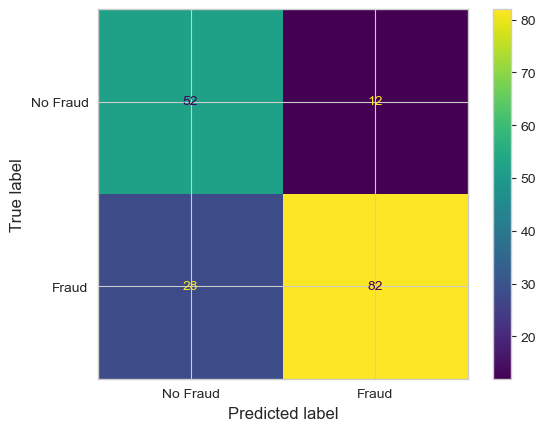

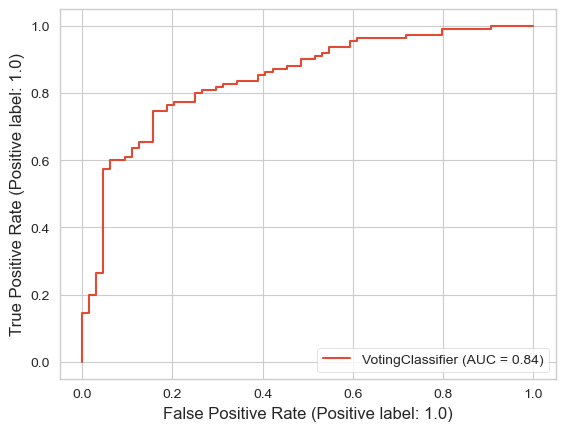

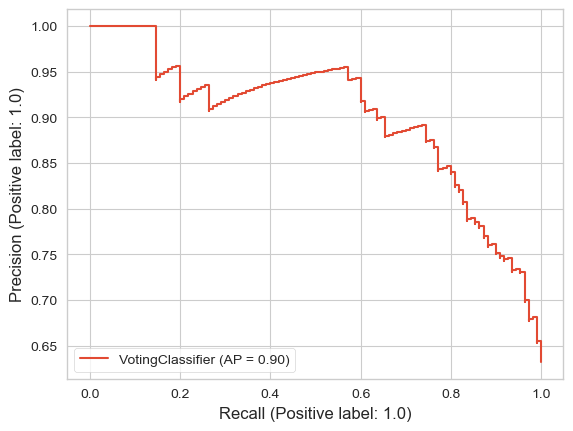

In [74]:
# Testing the XGBoost model using the test data and calculating metrics
import joblib
xgb_model = joblib.load('../model/VotingClassifier.pkl')
# xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)
xgb_fpr, xgb_tpr, xgb_default_recall = test_classifier(xgb_model, X_test, y_test)

In [75]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

Weight,Feature
0.0690 ± 0.0378,housing_status
0.0678 ± 0.0198,prev_address_months_count
0.0172 ± 0.0126,device_os
0.0149 ± 0.0172,phone_home_valid
0.0126 ± 0.0184,payment_type
0.0126 ± 0.0198,credit_risk_score
0.0092 ± 0.0092,has_other_cards
0.0034 ± 0.0117,bank_months_count
0.0034 ± 0.0156,date_of_birth_distinct_emails_4w
-0.0011 ± 0.0046,employment_status


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Classification Report for VotingClassifier
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.65      0.81      0.72        64
       Fraud       0.87      0.75      0.80       110

    accuracy                           0.77       174
   macro avg       0.76      0.78      0.76       174
weighted avg       0.79      0.77      0.77       174

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


c:\Users\jbanerje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\jbanerje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


c:\Users\jbanerje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


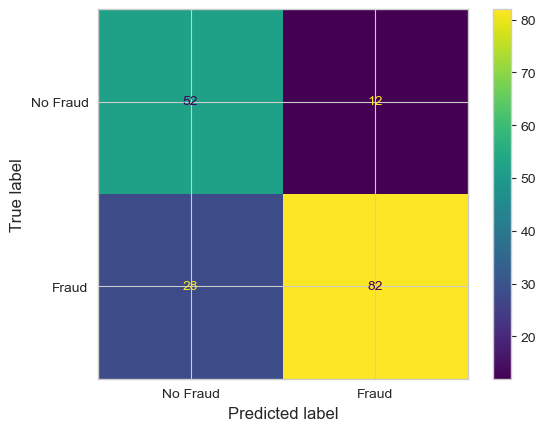

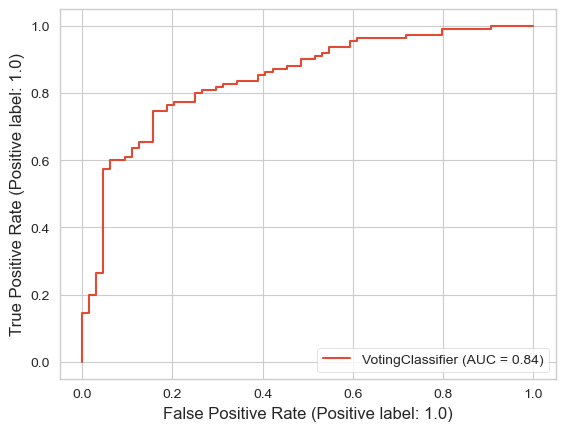

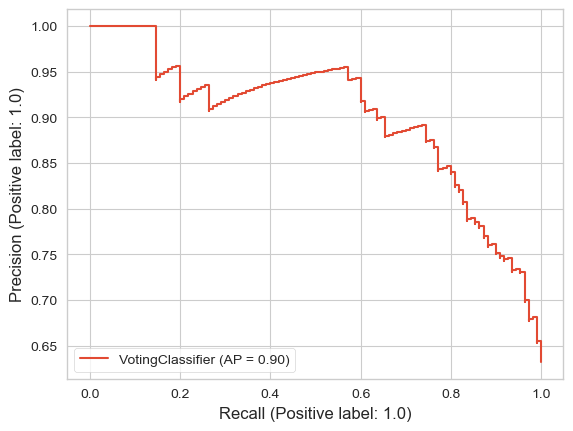

In [76]:
stacking_model = joblib.load('../model/StackingClassifier.pkl')
# xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)
xgb_fpr, xgb_tpr, xgb_default_recall = test_classifier(xgb_model, X_test, y_test)

In [89]:
# stacking_model.fit(X_train, y_train)
from sklearn.inspection import permutation_importance
result = permutation_importance(stacking_model, X_train, y_train)
perm_importance = pd.DataFrame({'Features':X_train.columns,'Permutation_Importance':result.importances_mean}).sort_values(by='Permutation_Importance', ascending=False)
perm_importance

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

,Features,Permutation_Importance
6,housing_status,8.93e-02
0,prev_address_months_count,6.77e-02
7,device_os,6.11e-02
2,credit_risk_score,3.74e-02
9,keep_alive_session,3.43e-02
1,date_of_birth_distinct_emails_4w,2.53e-02
3,bank_months_count,2.49e-02
10,has_other_cards,1.80e-02
12,payment_type,1.72e-02
11,phone_home_valid,1.39e-02


In [83]:
result

{'importances_mean': array([0.06428571, 0.02747253, 0.04491758, 0.02527473, 0.00865385,
        0.00178571, 0.08502747, 0.06318681, 0.00206044, 0.03214286,
        0.02568681, 0.02087912, 0.01662088]),
 'importances_std': array([0.00680742, 0.00264222, 0.00224032, 0.00501703, 0.00171566,
        0.00259175, 0.00348587, 0.00713757, 0.00086876, 0.00617979,
        0.00240286, 0.00413459, 0.00186328]),
 'importances': array([[ 0.05906593,  0.07211538,  0.05425824,  0.06524725,  0.07074176],
        [ 0.02678571,  0.02884615,  0.02884615,  0.02266484,  0.03021978],
        [ 0.0418956 ,  0.04739011,  0.0467033 ,  0.04258242,  0.04601648],
        [ 0.02884615,  0.02747253,  0.02197802,  0.03090659,  0.01717033],
        [ 0.00824176,  0.00961538,  0.00961538,  0.0103022 ,  0.00549451],
        [ 0.00549451, -0.00206044,  0.00274725,  0.00274725,  0.        ],
        [ 0.08104396,  0.08653846,  0.08104396,  0.08653846,  0.08997253],
        [ 0.07211538,  0.05288462,  0.05769231,  0.063873

In [ ]:
%%time
# Light GBM base model
# Initiate classifier to use
lgbm_classifier = LGBMClassifier(random_state=42)

# Grid Search for Light GBM
gridParams = {
                'n_estimators': [10, 50, 100, 500],
                'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
                'colsample_bytree': [0.6, 0.8, 1.0],
                'subsample' : [0.6, 0.8, 1.0],
                'max_depth': [2, 4, 6, 8, 10]
    }

grid = GridSearchCV(lgbm_classifier, gridParams, verbose=1, cv=4, n_jobs=-1, scoring = 'recall')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 714, number of negative: 764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 1478, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483085 -> initscore=-0.067685
[LightGBM] [Info] Start training from score -0.067685
{'boosting_type': 'dart', 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 

In [76]:
%%time
# Xtreme GBM base model
# Initiate classifier to use
xgb_classifier = XGBClassifier(random_state=42)

# Grid Search for XGBOOST
gridParams = {
        'n_estimators': [10, 50, 100, 500],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid = GridSearchCV(xgb_classifier, gridParams, verbose=1, cv=5, n_jobs=-1, scoring = 'recall')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 8100 candidates, totalling 40500 fits
{'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 1.0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 1.0}
0.7842312616960505
CPU times: total: 1min 26s
Wall time: 11min 42s


In [77]:
%%time
# AdaBoost Base Model
# Initiate classifier to use
abc_classifier = AdaBoostClassifier(random_state=42)

# Grid Search for XGBOOST
gridParams = {
        'n_estimators': [10, 50, 100, 500],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
        }

grid = GridSearchCV(abc_classifier, gridParams, verbose=1, cv=5, n_jobs=-1, scoring = 'recall')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'learning_rate': 0.1, 'n_estimators': 500}
0.7687777011720673
CPU times: total: 828 ms
Wall time: 9.63 s


In [46]:
# # Random Forest Model with Grid Paramaters
# adpb_classifier = AdaBoostClassifier(random_state=42)
# adpb_classifier.fit(X_train,y_train)
# feature_importances = pd.DataFrame(adpb_classifier.feature_importances_,
#                                    index = X_train.columns,
#                                    columns=['Feature_Importance']).sort_values('Feature_Importance', ascending=False)
# feature_importances
# # feature_importances.plot(kind='barh')

,Feature_Importance
housing_status,0.08
name_email_similarity,0.08
velocity_4w,0.08
employment_status,0.06
bank_branch_count_8w,0.06
current_address_months_count,0.06
days_since_request,0.06
keep_alive_session,0.04
device_os,0.04
proposed_credit_limit,0.04


In [90]:
metrics_df = pd.read_csv('../model/results.csv')
metrics_df.head()

,Unnamed: 0,Classifier,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr,CV_Score,FPR,TPR
0,1,AdaBoostClassifier,[[84 14]\n [27 80]],0.80,0.85,0.75,0.80,0.80,0.78,[0. 0.14285714 1. ],[0. 0.74766355 1. ]
1,2,XGBClassifier,[[85 13]\n [31 76]],0.79,0.85,0.71,0.78,0.79,0.75,[0. 0.13265306 1. ],[0. 0.71028037 1. ]
2,3,LGBMClassifier,[[77 21]\n [27 80]],0.77,0.79,0.75,0.77,0.77,0.76,[0. 0.21428571 1. ],[0. 0.74766355 1. ]
3,0,RandomForestClassifier,[[80 18]\n [31 76]],0.76,0.81,0.71,0.76,0.76,0.76,[0. 0.18367347 1. ],[0. 0.71028037 1. ]
4,0,VotingClassifier,[[85 13]\n [26 81]],0.81,0.86,0.76,0.81,0.81,0.77,[0. 0.13265306 1. ],[0. 0.75700935 1. ]


In [91]:
metrics_df.columns

Index(['Unnamed: 0', 'Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision',
       'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR'],
      dtype='object')

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


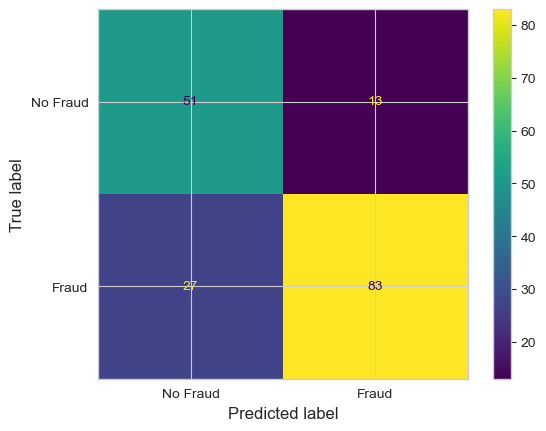

In [120]:
classifier = joblib.load('../model/VotingClassifier.pkl')
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Fraud', 'Fraud'])
disp.plot()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


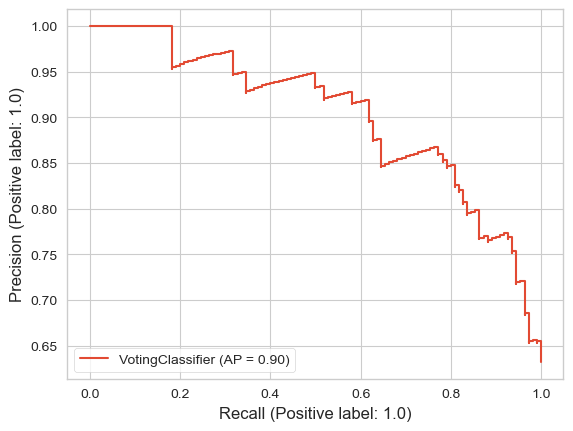

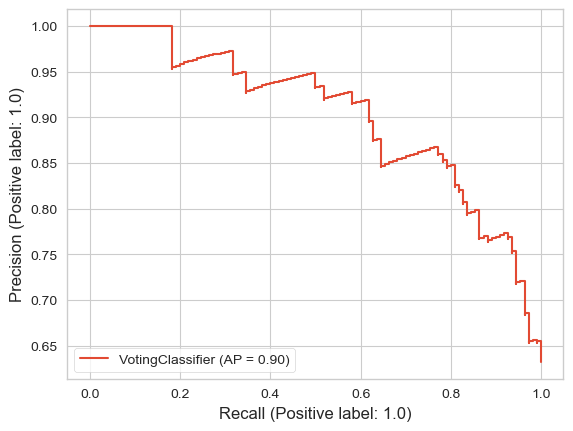

In [122]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.plot()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


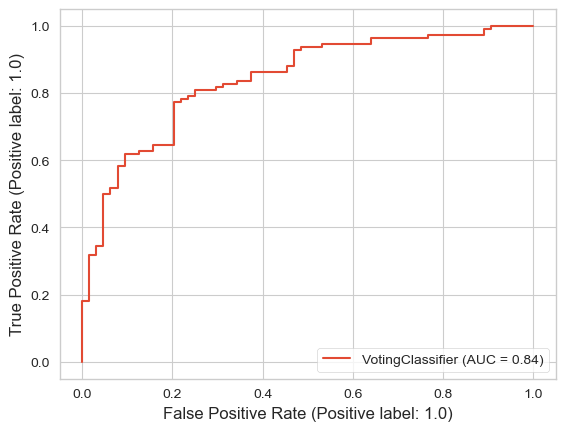

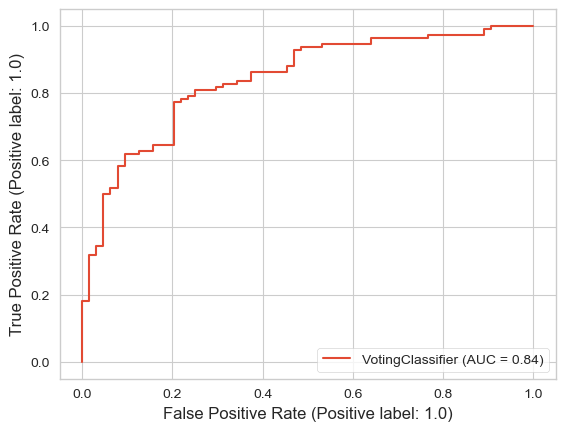

In [121]:
# precision, recall, _ = precision_recall_curve(y_test, predictions)
# 
# y_pred = classifier.predict_proba(X_test)[:, 1]
disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)



In [92]:
metrics_df[metrics_df.Classifier == 'AdaBoostClassifier'][['Classifier', 'Accuracy', 'Precision',
       'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR',]]

,Classifier,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr,CV_Score,FPR
0,AdaBoostClassifier,0.8,0.85,0.75,0.8,0.8,0.78,[0. 0.14285714 1. ]
